# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import math

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(mouse_metadata, study_results,  on = "Mouse ID")

# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Checking the number of mice.
print(len(mouse_metadata))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [65]:
duplicated = complete_df[complete_df.duplicated()]
duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [15]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df.loc[complete_df["Mouse ID"] != "g989"]
clean_df["Drug Regimen"] == "Capomulin"

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Drug Regimen, Length: 1880, dtype: bool

In [67]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
capomulin_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
ceftamin_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]
infubinol_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
ketapril_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Ketapril"]
naftisol_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Naftisol"]
placebo_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Placebo"]
propriva_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Propriva"]
ramicane_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
stelasyn_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Stelasyn"]
zoniferol_tumor = clean_df.loc[clean_df["Drug Regimen"] == "Zoniferol"]

capomulin_tumor = capomulin_tumor["Tumor Volume (mm3)"]
ceftamin_tumor = ceftamin_tumor["Tumor Volume (mm3)"]
infubinol_tumor = infubinol_tumor["Tumor Volume (mm3)"]
ketapril_tumor = ketapril_tumor["Tumor Volume (mm3)"]
naftisol_tumor = naftisol_tumor["Tumor Volume (mm3)"]
placebo_tumor = placebo_tumor["Tumor Volume (mm3)"]
propriva_tumor = propriva_tumor["Tumor Volume (mm3)"]
ramicane_tumor = ramicane_tumor["Tumor Volume (mm3)"]
stelasyn_tumor = stelasyn_tumor["Tumor Volume (mm3)"]
zoniferol_tumor = zoniferol_tumor["Tumor Volume (mm3)"]

names = ["Capomulin","Ceftamin", "Infubinol", "Ketapril","Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"  ]
regimen = [capomulin_tumor, ceftamin_tumor,infubinol_tumor, ketapril_tumor, 
           naftisol_tumor, placebo_tumor, propriva_tumor, ramicane_tumor, stelasyn_tumor, zoniferol_tumor ]
means = [i.mean() for i in regimen]
medians = [i.median() for i in regimen]
var = [np.var(i) for i in regimen]
stdevs = [st.tstd(i) for i in regimen]


sample = clean_df["Tumor Volume (mm3)"].sample(100)


se = [i/math.sqrt(len(clean_df)) for i in stdevs]

df = pd.DataFrame({"Mean Tumor Volume": means, 
                  "Median Tumor Volume": medians,
                  "Tumor Volume Variance": var,
                  "Tumor Volume Std. Dev": stdevs,
                  "Tumor Volume Std. Error": se}, index = names)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Error
Capomulin,40.675741,41.557809,24.839296,4.994774,0.115196
Ceftamin,52.591172,51.776157,39.069446,6.268188,0.144565
Infubinol,52.884795,51.820584,42.886388,6.567243,0.151462
Ketapril,55.235638,53.698743,68.188930,8.279709,0.190957
Naftisol,54.331565,52.509285,65.817708,8.134708,0.187613
Placebo,54.033581,52.288934,60.830138,7.821003,0.180378
Propriva,52.320930,50.446266,43.555716,6.622085,0.152727
Ramicane,40.216745,40.673236,23.383692,4.846308,0.111772
Stelasyn,54.233149,52.431737,59.122106,7.710419,0.177828
Zoniferol,53.236507,51.818479,48.266689,6.966589,0.160672


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [31]:
mean = clean_df.groupby("Drug Regimen").mean()
mean

C:\Users\dawso\AppData\Local\Temp\ipykernel_8096\1604059857.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_df.groupby("Drug Regimen").mean()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


## Bar and Pie Charts

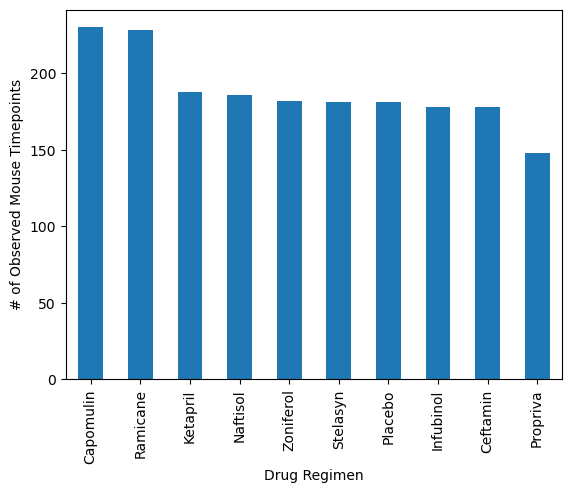

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

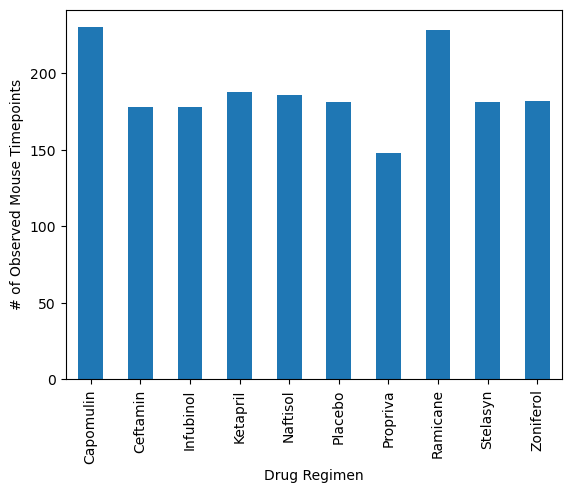

In [13]:
bar_chart = clean_df.groupby("Drug Regimen").count()
idnumber = bar_chart["Mouse ID"]

idnumber.plot.bar(ylabel = "# of Observed Mouse Timepoints")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

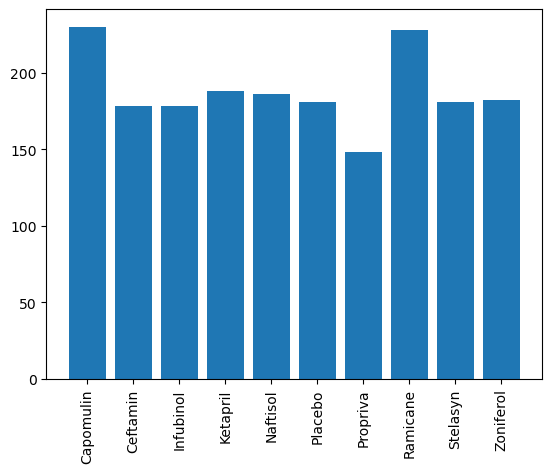

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
names = ["Capomulin","Ceftamin", "Infubinol", "Ketapril","Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn","Zoniferol"  ]
plt.bar(names, bar_chart["Mouse ID"])
plt.xticks(rotation = "vertical")

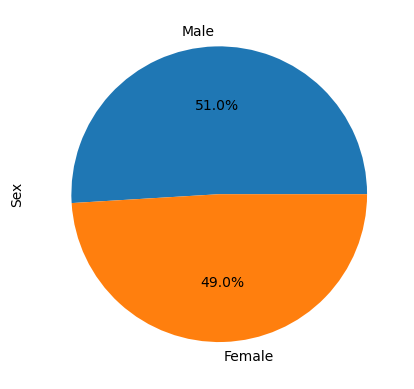

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


<Axes: ylabel='Sex'>

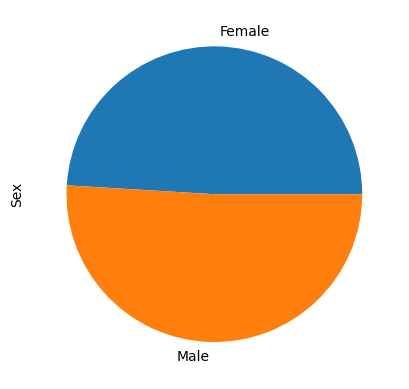

In [45]:
pie_chart = clean_df.groupby("Sex").count()
sex_chart = pie_chart["Mouse ID"]
sex_chart.plot.pie(ylabel = "Sex")


TypeError: object of type 'numpy.float32' has no len()

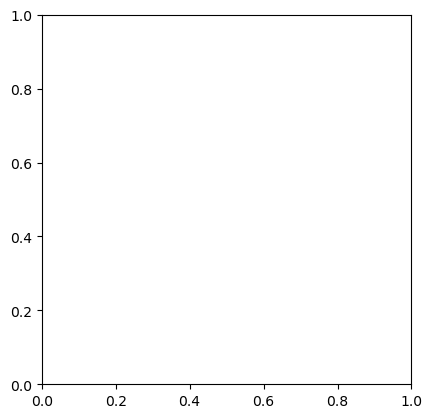

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df["Sex"].count())

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


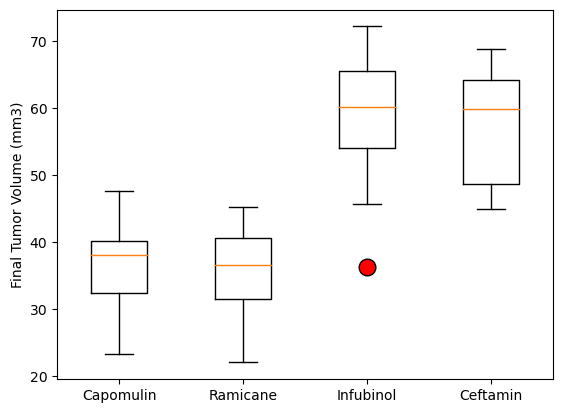

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

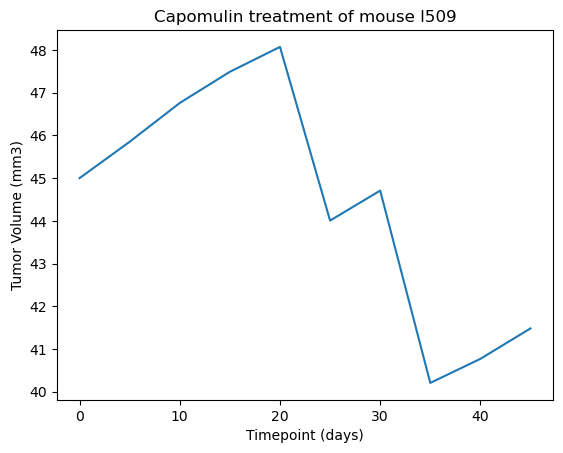

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


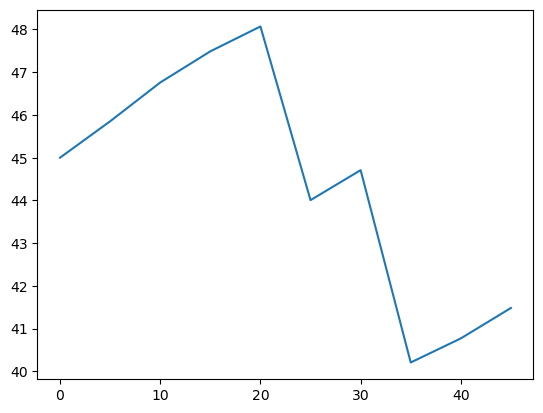

In [56]:
mouse_l509 = clean_df.loc[clean_df["Mouse ID"]=="l509"]

plt.plot(mouse_k403["Timepoint"], mouse_k403["Tumor Volume (mm3)"])

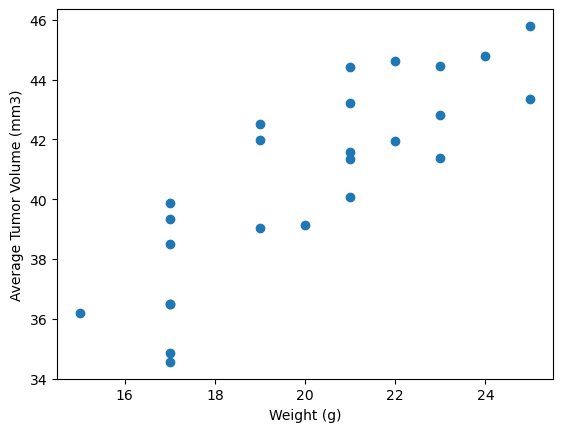

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


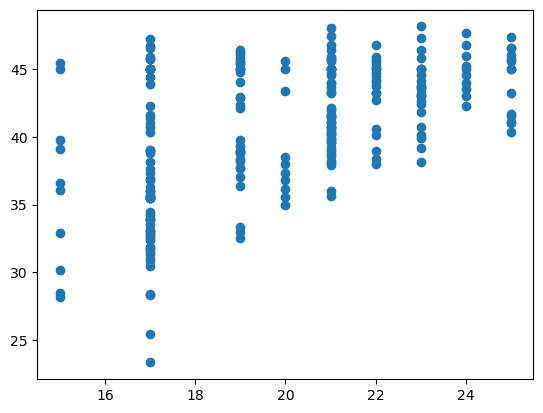

In [73]:
capo_regimen = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
plt.scatter(capo_regimen["Weight (g)"], capo_regimen["Tumor Volume (mm3)"])


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


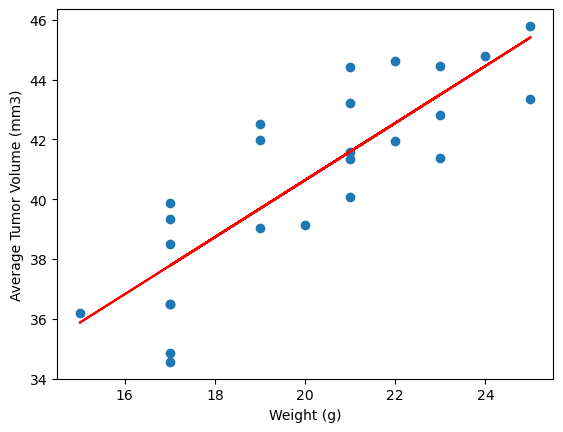

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


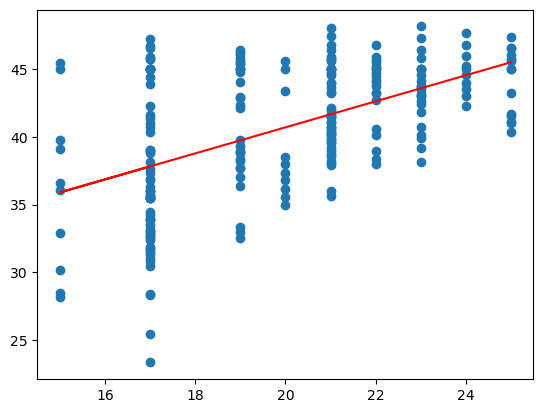

In [71]:
x_values = capo_regimen["Weight (g)"]
y_values = capo_regimen["Tumor Volume (mm3)"]


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))

capo_regimen = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
plt.scatter(capo_regimen["Weight (g)"], capo_regimen["Tumor Volume (mm3)"])
plt.plot(x_values, regress_values, "r-")